# 算法原理

具体的实现方式主要有三种：Lloyd(Forgy)，Hartigan-Wong和MacQueen

 



**Lloyd算法**

Lloyd算法也可以称作Forgy或者Lloyd-Forgy，是最为经典简单的K-means迭代算法，其步骤如下：

1. 随机选取K个点作为初始的簇心

2. 计算每个点与K个簇心的距离(假如有N个点，就有N*K个距离值)

3. 以距离最小为原则，将所有的点分划到以此K个簇心为代表的簇
   
4. 以平均的方式重新计算每个簇的簇心

5. 重复步骤2~4

6. 直到达到收敛或者达到某个停止阈值(如最大计算时间)

**需要注意的是Lloyd算法使用的是平方欧氏距离，使用该距离可使得步骤4后的簇心距离和得到最大程度的降低。证明如下：**

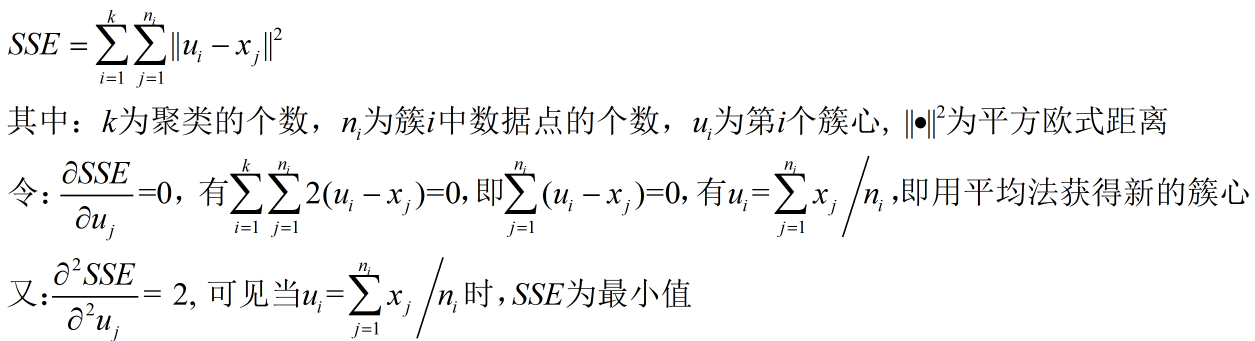



**Lloyd算法的缺点**

聚类产生的类别经常是不平衡的，就是说不同类中样本的数量差异很大。这点会经常被忽略到，然而很多时候需要我们聚类出来是平衡的，例如对手写数字图像进行聚类的时候，我们有理由相信10个数字出现的频率是一样的，所以希望聚类后每个类中含有样本数量是相同的。像上述的手写数字图像聚类这个例子中 ，为获得更高的分类准确率，则需要平衡的聚类结果。另外，Lloyd算法是一个批量更新算法，因此会学习速度会相对较快。

 

**MacQueen算法**

MacQueen是一种在线更新的算法，只需要一次迭代，具体步骤如下：

1. 选取头K个点作为K个类的中心点

2. 选取下一个点计算与K个中心点的距离，选取距离最小的分配到该类中

3. 更新该类的中心点

4. 重复2,3直到所有的点分配完毕，达到收敛

MacQueen相对于Lloyd而言，总体的训练时间需要更久。

 

**Hartigan-Wong算法**

为了改进上述算法的不平衡问题，我们可以考虑用Hartigan-Wong算法，它也是一种在线更新的算法，具体如下：

1. 随机分配所有的点到K个类上，计算K个类的中心

1.  随机选择一个点，把它移出所属类

1. 重新计算有变化的类的中心

1. 把移出的点重新分配到其距离最近的中心点的类上

1. 循环所有的点，重复2,3,4

1. 进行第二次循环，重复2,3,4,5

1. 直到达到收敛或者某个停止阈值

## Squared euclidean distance(Lloyd算法)

--Adjust Centroids时SSE肯定不会上升(其实是最大程度下降)

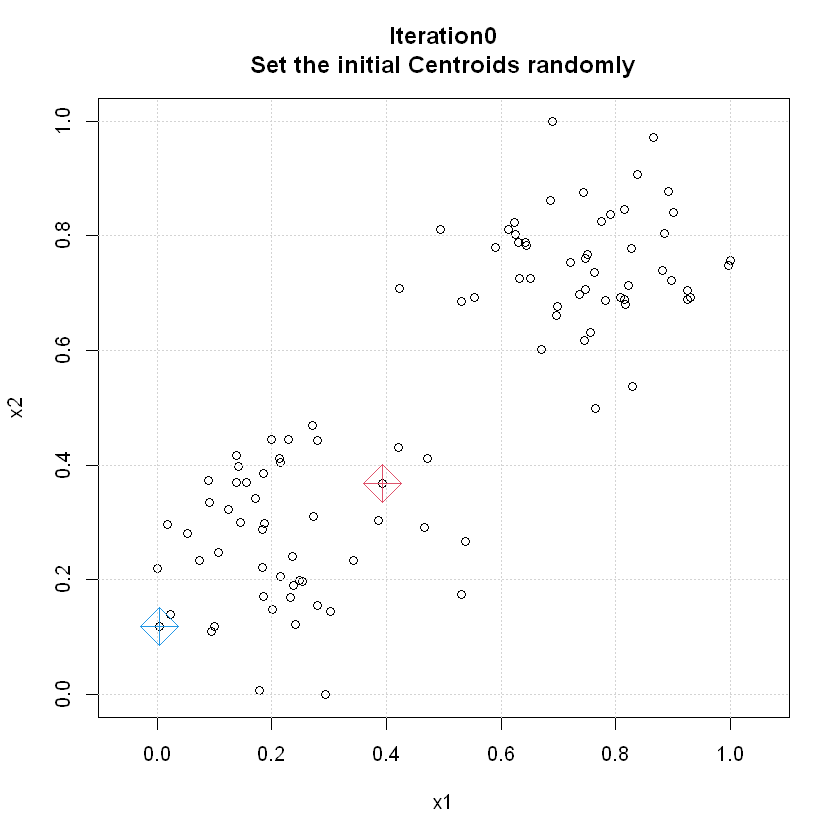

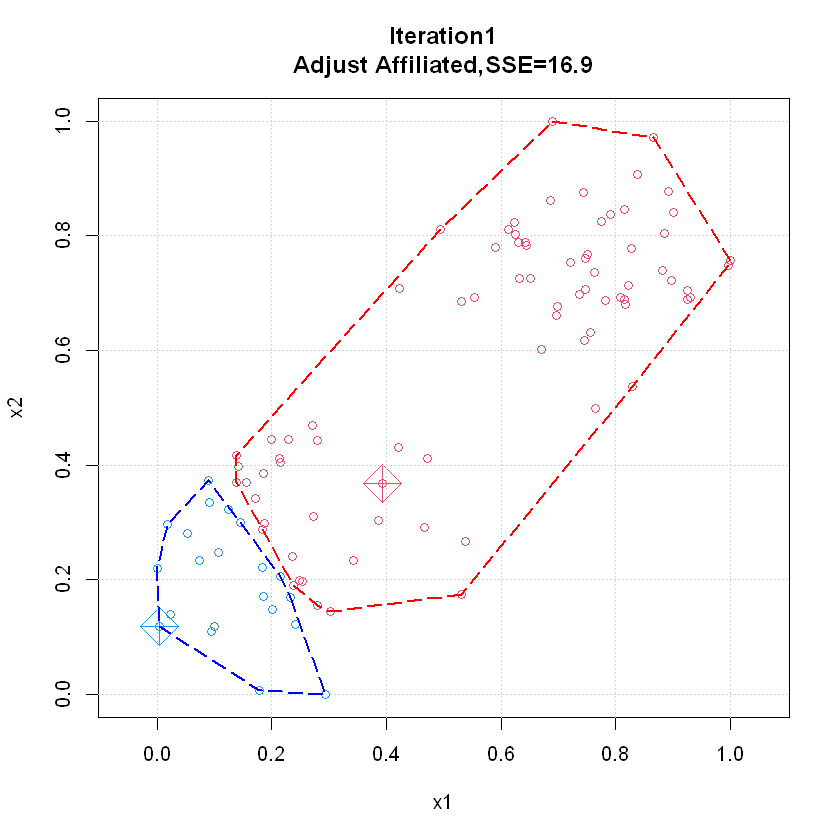

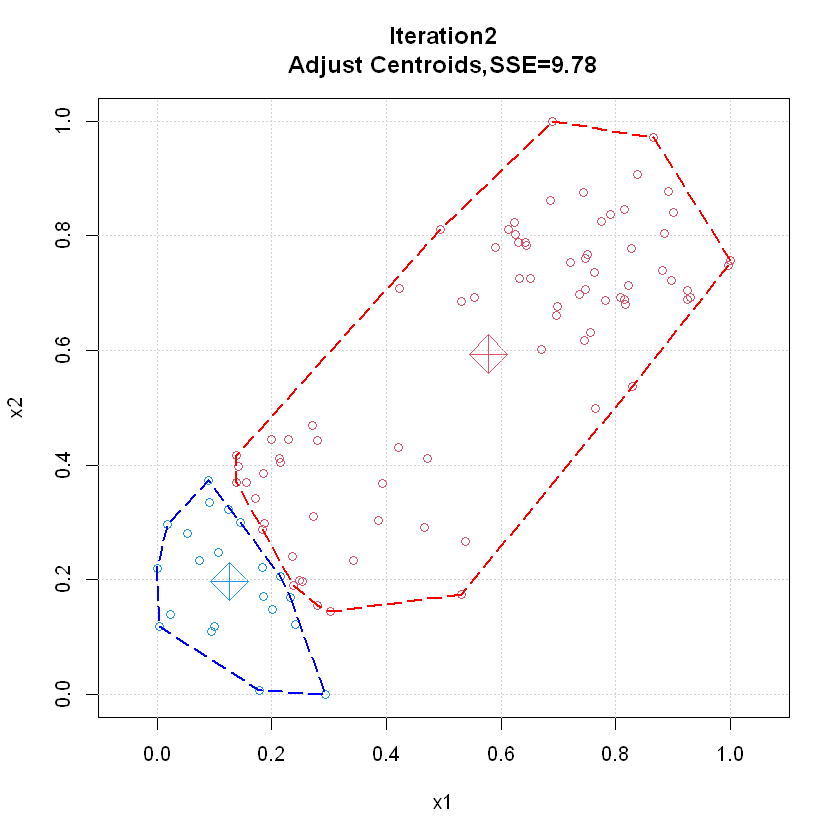

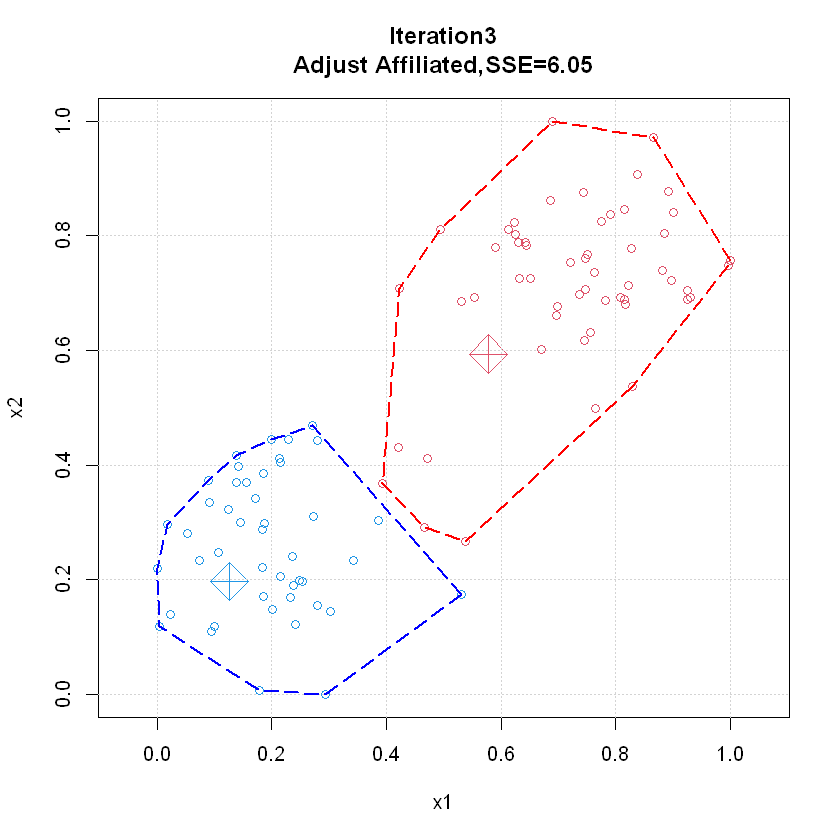

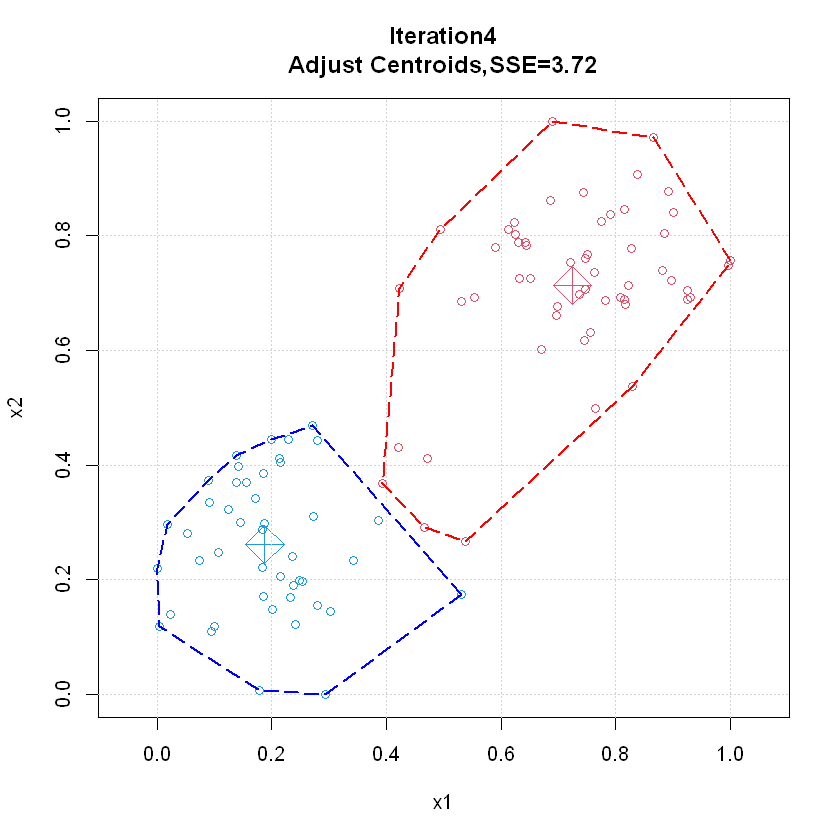

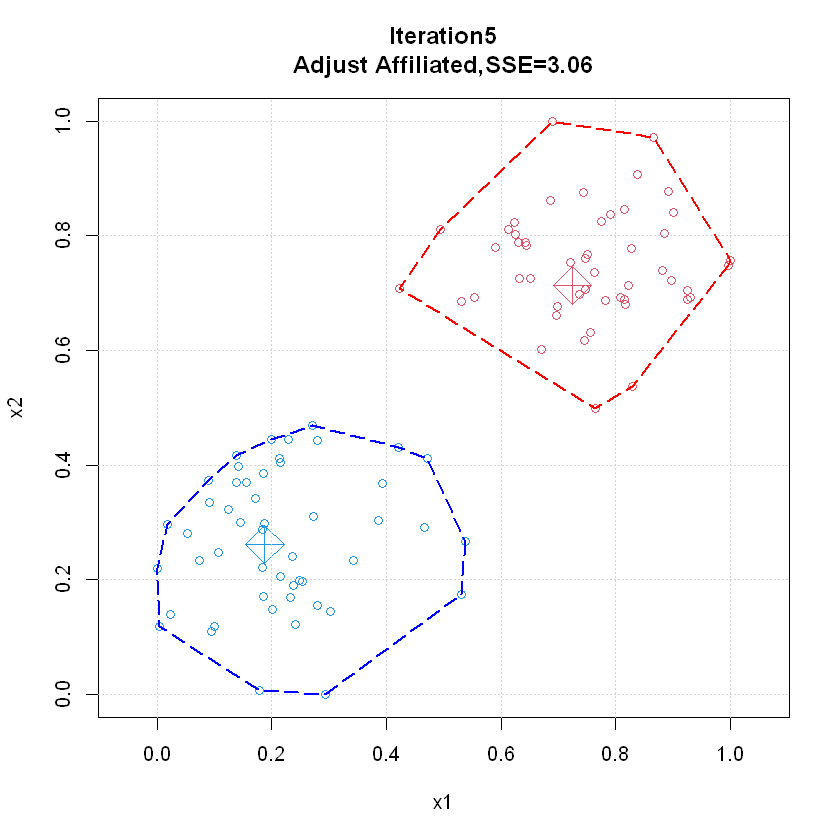

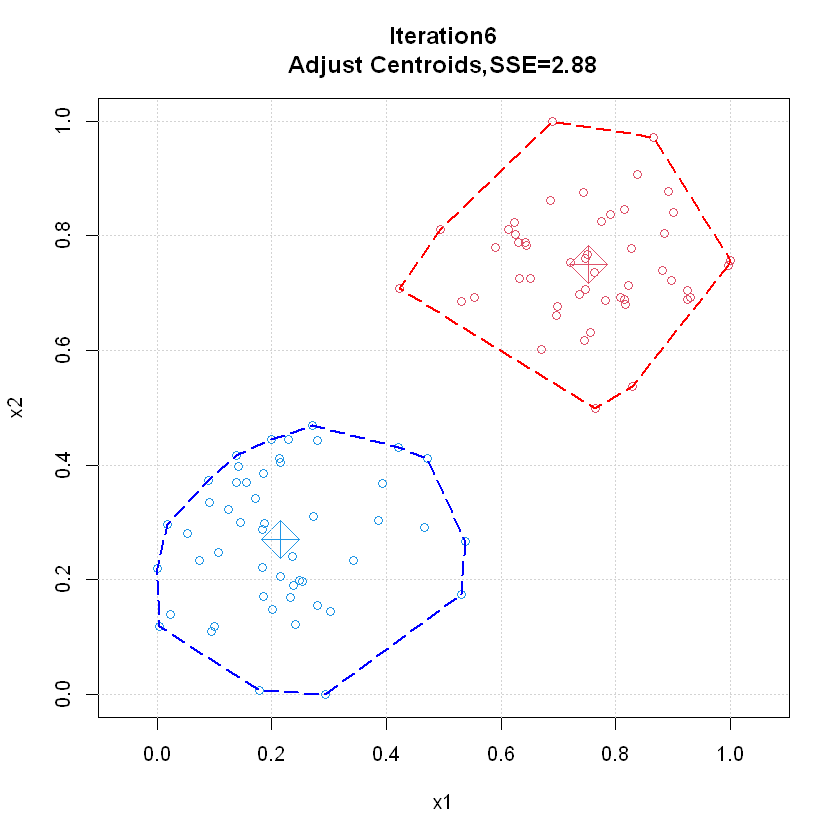

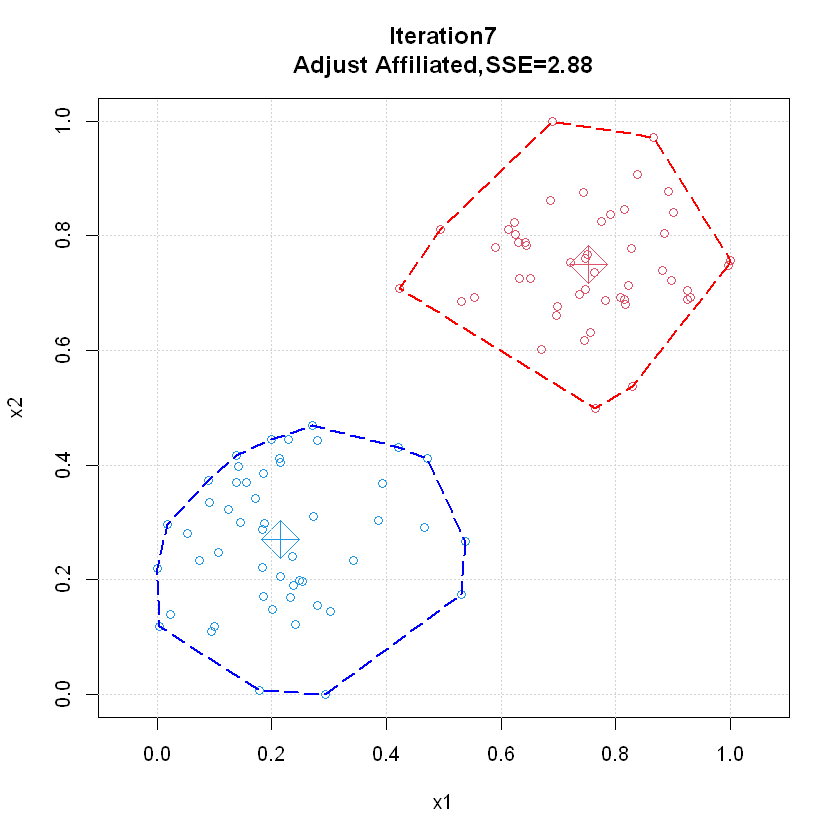

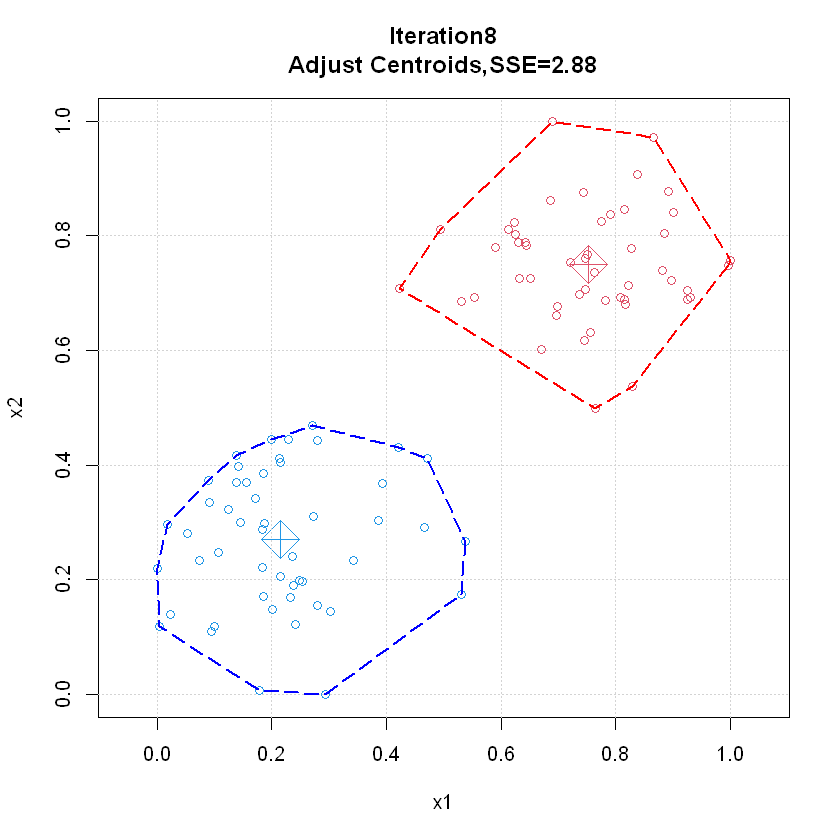

SSE的迭代值为： 16.89623 9.779719 6.051077 3.721712 3.056409 2.878635 2.878635 2.878635

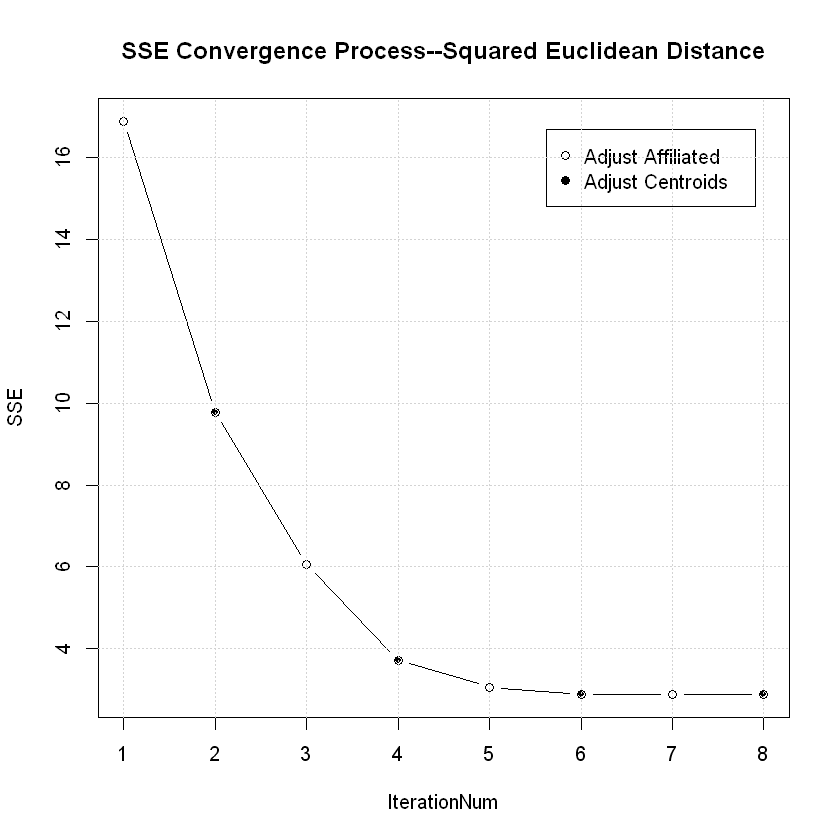

In [11]:
# ----------------------------------------生成数据--------------------------------------------------------------
normalize <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}
set.seed(66)
x <- rbind(
  matrix(rnorm(100, sd = 0.25), ncol = 2),
  matrix(rnorm(100, mean = 1, sd = 0.25), ncol = 2)
)

x[, 1] <- normalize(x[, 1])
x[, 2] <- normalize(x[, 2])

plot(x, asp = 1, main = paste0("Iteration", 0, "\nSet the initial Centroids randomly"), xlab = "x1", ylab = "x2")
grid()

# --------------------随机设置初始簇心-------------------------------------
cn <- sample(100, 2)
c1 <- x[cn[1], ]
c2 <- x[cn[2], ]
c <- rbind(c1, c2)
points(c, pch = 9, col = c(4, 2), cex = 3)

b <- (colSums((t(x) - c1)^2) < colSums((t(x) - c2)^2)) # 从属于簇1的点
SSE <- sum((x[b, ] - c1)^2) + sum((x[!b, ] - c2)^2)
r_SSE <- SSE # SSE iterate records

# -------------------------------迭代优化----------------------------------
i <- 1
tolerance <- 0.01 # 收敛的容忍度
repeat {
  #-------------------------------更新归属---------------------------------
  if (i > 1) {
    b <- (colSums((t(x) - c1)^2) < colSums((t(x) - c2)^2)) # 从属于簇1的点
    SSE <- sum((x[b, ] - c1)^2) + sum((x[!b, ] - c2)^2)
    r_SSE <- c(r_SSE, SSE)
  }
  col <- (b + 1) * 2 # 颜色值

  plot(x, asp = 1, main = paste0(
    "Iteration", i, "\nAdjust Affiliated,SSE=",
    round(SSE, digits = 2)
  ), xlab = "x1", ylab = "x2")

  points(c, pch = 9, col = c(4, 2), cex = 3)
  grid()
  points(x, col = col)

  # --------------------各自的轮廓--------------------------------
  x1 <- x[b, ]
  x2 <- x[!b, ]
  polygon(x1[chull(x1), ], lty = 5, lwd = 2, border = "blue")
  polygon(x2[chull(x2), ], lty = 5, lwd = 2, border = "red")

  i <- i + 1

  #------------------------------更新簇心------------------------------------
  b <- (colSums((t(x) - c1)^2) < colSums((t(x) - c2)^2)) # 从属于簇1的点
  c1 <- colMeans(x[b, ])
  c2 <- colMeans(x[!b, ])
  c <- rbind(c1, c2)

  SSE <- sum((x[b, ] - c1)^2) + sum((x[!b, ] - c2)^2)
  r_SSE <- c(r_SSE, SSE)

  plot(x, asp = 1, main = paste0(
    "Iteration", i, "\nAdjust Centroids,SSE=",
    round(SSE, digits = 2)
  ), xlab = "x1", ylab = "x2")

  points(c, pch = 9, col = c(4, 2), cex = 3)
  grid()
  col <- (b + 1) * 2 # 颜色值
  points(x, col = col)
  # --------------------各自的轮廓-------------------------
  x1 <- x[b, ]
  x2 <- x[!b, ]
  polygon(x1[chull(x1), ], lty = 5, lwd = 2, border = "blue")
  polygon(x2[chull(x2), ], lty = 5, lwd = 2, border = "red")


  if (length(r_SSE) > 1) {
    if ((r_SSE[i - 1] - r_SSE[i]) < tolerance) {
      break
    }
  }

  i <- i + 1
}

# -------------------SSE收敛过程-------------------------
plot(r_SSE,
  type = "b", xlab = "IterationNum", ylab = "SSE",
  main = "SSE Convergence Process--Squared Euclidean Distance"
)
even <- seq(from = 2, to = length(r_SSE), by = 2)
points(even, r_SSE[even], pch = 20)
axis(1, 1:length(r_SSE))
legend("topright",
  inset = 0.05, c("Adjust Affiliated", "Adjust Centroids"),
  pt.cex = c(1, 1.5), pch = c(1, 20)
)
grid()

cat("SSE的迭代值为：", r_SSE)

## Euclidean distance kmeans收敛情况

--Adjust Centroids时SSE可能会上升

SSE的迭代值为： 21.28527 13.83754 13.56521 13.57794 13.57794 13.57794

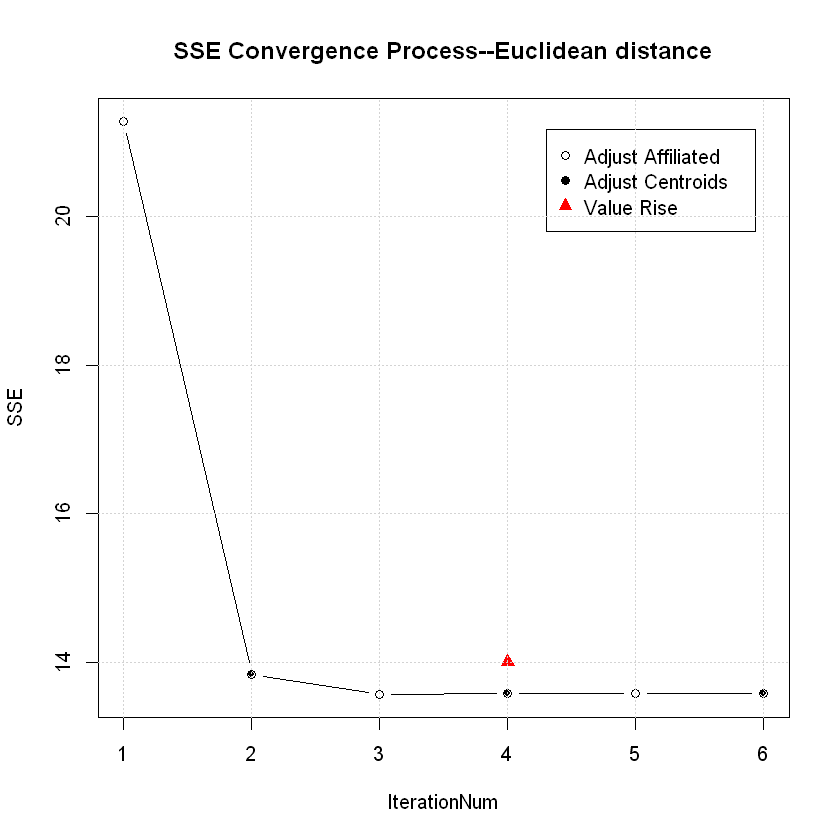

In [4]:
# ------------Data points that to cluster---------------------
normalize <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}
set.seed(11)
x <- rbind(
  matrix(rnorm(100, sd = 0.25), ncol = 2),
  matrix(rnorm(100, mean = 1, sd = 0.25), ncol = 2)
)

x[, 1] <- normalize(x[, 1])
x[, 2] <- normalize(x[, 2])

seed <- 100
repeat{
  seed <- seed + 1
  set.seed(seed)
  # --------------------随机设置初始簇心-------------------------------------
  cn <- sample(100, 2)
  c1 <- x[cn[1], ]
  c2 <- x[cn[2], ]
  c <- rbind(c1, c2)

  r_SSE <- NULL # SSE iterate records
  # -------------------------------迭代优化----------------------------------
  i <- 1
  tolerance <- 0.01 # 收敛的容忍度
  repeat {
    #-------------------------------更新归属---------------------------------
    b <- sqrt(colSums((t(x) - c1)^2)) < sqrt(colSums((t(x) - c2)^2)) # 从属于簇1的点
    SSE <- sum(sqrt(colSums((t(x[b, ]) - c1)^2))) + sum(sqrt(colSums((t(x[!b, ]) - c2)^2)))
    r_SSE <- c(r_SSE, SSE)

    i <- i + 1
    #------------------------------更新簇心------------------------------------
    c1 <- ifelse(sum(b) > 1, colMeans(x[b, ]), x[b, ])
    c2 <- ifelse(sum(!b) > 1, colMeans(x[!b, ]), x[!b, ])

    SSE <- sum(sqrt(colSums((t(x[b, ]) - c1)^2))) + sum(sqrt(colSums((t(x[!b, ]) - c2)^2)))
    r_SSE <- c(r_SSE, SSE)

    if (length(r_SSE) > 1) {
      if (abs(r_SSE[i - 1] - r_SSE[i]) < tolerance) {
        break
      }
    }

    i <- i + 1
  }

  if (any(diff(r_SSE) > 0)) {
    break
  }
}

cat("SSE的迭代值为：", r_SSE)
n <- (which((diff(r_SSE) > 0) == TRUE) + 1) # r_SSE的第几个点值上升

# -------------------SSE收敛过程-------------------------
plot(r_SSE,
  type = "b", xlab = "IterationNum", ylab = "SSE",
  main = "SSE Convergence Process--Euclidean distance"
)
even <- seq(from = 2, to = length(r_SSE), by = 2)
points(even, r_SSE[even], pch = 20) # 将双数点(Adjust Centroids)画为实心

# 标出SSE上升的点
if (r_SSE[n] == max(r_SSE)) {
  points(n, r_SSE[n] - max(r_SSE) / 50, pch = 17, cex = 1.2, col = "red")
} else {
  points(n, r_SSE[n] + max(r_SSE) / 50, pch = 17, cex = 1.2, col = "red")
}

axis(1, 1:length(r_SSE))
legend("topright",
  inset = 0.05, c("Adjust Affiliated", "Adjust Centroids", "Value Rise"),
  pt.cex = c(1.03, 1.5, 1.2), pch = c(1, 20, 17), col = c("black", "black", "red")
)
grid()

## Manhattan distance kmeans收敛情况

--Adjust Centroids时SSE可能会上升

SSE的迭代值为： 65.98664 40.32527 30.0159 17.9128 17.11343 17.1319 17.1319 17.1319

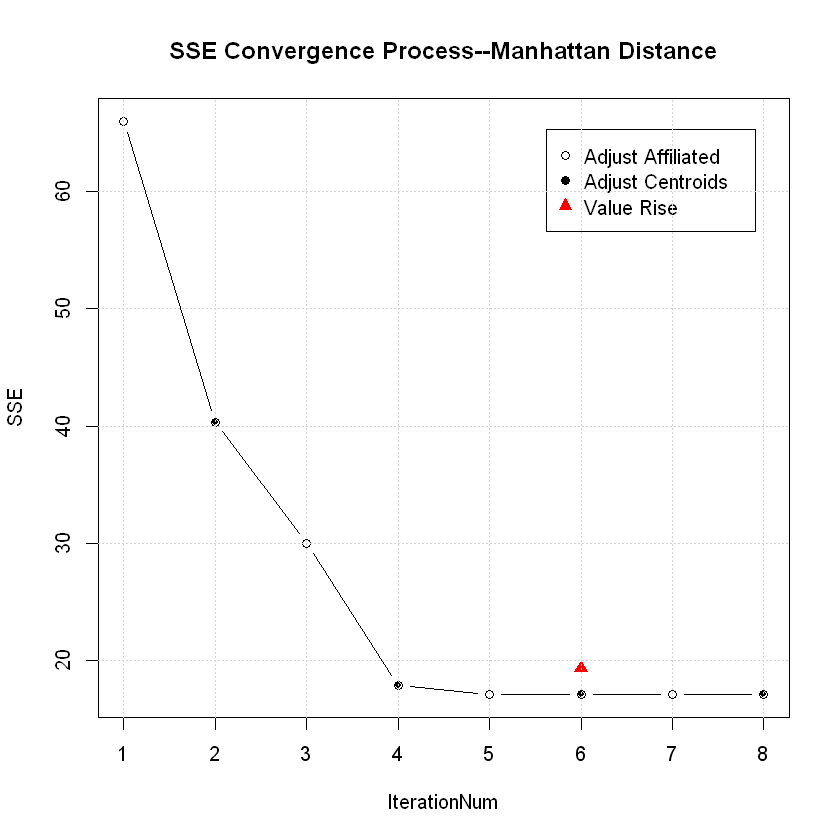

In [13]:
# ------------Data points that to cluster---------------------
normalize <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}
set.seed(11)
x <- rbind(
  matrix(rnorm(100, sd = 0.25), ncol = 2),
  matrix(rnorm(100, mean = 1, sd = 0.25), ncol = 2)
)

x[, 1] <- normalize(x[, 1])
x[, 2] <- normalize(x[, 2])

seed <- 1
#==更换初始簇心，找到Adjust Centroids时SSE提升的例子=========
repeat{
  seed <- seed + 1
  set.seed(seed)
  # ----------------随机设置初始簇心----------------
  cn <- sample(100, 2)
  c1 <- x[cn[1], ]
  c2 <- x[cn[2], ]
  c <- rbind(c1, c2)

  r_SSE <- NULL # SSE iterate records
  # -------------------------------迭代优化-----------
  i <- 1
  tolerance <- 0.01 # 收敛的容忍度
  repeat {
    #-------------------------------更新归属---------------------------------
    b <- colSums(abs((t(x) - c1))) < colSums(abs((t(x) - c2))) # 从属于簇1的点
    SSE <- sum(abs(t(x[b, ]) - c1)) + sum(abs(t(x[!b, ]) - c2))
    r_SSE <- c(r_SSE, SSE)

    i <- i + 1
    #------------------------------更新簇心------------------------------------
    c1 <- colMeans(x[b, ])
    c2 <- colMeans(x[!b, ])

    SSE <- sum(abs(t(x[b, ]) - c1)) + sum(abs(t(x[!b, ]) - c2))
    r_SSE <- c(r_SSE, SSE)

    if (length(r_SSE) > 1) {
      if (abs(r_SSE[i - 1] - r_SSE[i]) < tolerance) {
        break
      }
    }

    i <- i + 1
  }

  if (any(diff(r_SSE) > 0)) {
    break
  }
}

cat("SSE的迭代值为：", r_SSE)
n <- (which((diff(r_SSE) > 0) == TRUE) + 1) # r_SSE的第几个点值上升

# -------------------SSE收敛过程-------------------------
plot(r_SSE,
  type = "b", xlab = "IterationNum", ylab = "SSE",
  main = "SSE Convergence Process--Manhattan Distance"
)
even <- seq(from = 2, to = length(r_SSE), by = 2)
points(even, r_SSE[even], pch = 20) # 将双数点(Adjust Centroids)画为实心

# 标出SSE上升的点
if (r_SSE[n] == max(r_SSE)) {
  points(n, r_SSE[n] - max(r_SSE) / 30, pch = 17, cex = 1.2, col = "red")
} else {
  points(n, r_SSE[n] + max(r_SSE) / 30, pch = 17, cex = 1.2, col = "red")
}

axis(1, 1:length(r_SSE))
legend("topright",
  inset = 0.05, c("Adjust Affiliated", "Adjust Centroids", "Value Rise"),
  pt.cex = c(1.03, 1.5, 1.2), pch = c(1, 20, 17), col = c("black", "black", "red")
)
grid()


## 收敛于局部最优(Lloyd算法)

  |======================================================================| 100%

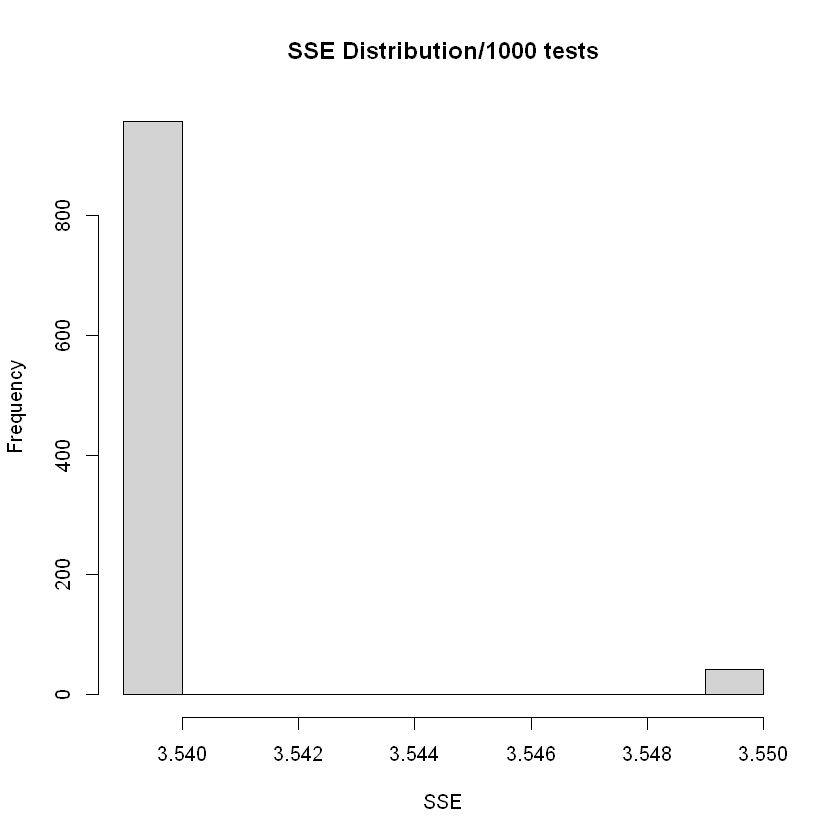

In [2]:
# ---------------------生成数据-----------------------------------
normalize <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}
set.seed(6)
x <- rbind(
  matrix(rnorm(100, sd = 0.25), ncol = 2),
  matrix(rnorm(100, mean = 1, sd = 0.25), ncol = 2)
)

x[, 1] <- normalize(x[, 1])
x[, 2] <- normalize(x[, 2])

c_SSE <- NULL # SSE的收敛值

pb <- txtProgressBar(style = 3)
n <- 1000
for (i in 1:n) {
  r_SSE <- NULL

  # --------------------随机设置初始簇心----------------------------
  set.seed(i)
  cn <- sample(100, 2)
  c1 <- x[cn[1], ]
  c2 <- x[cn[2], ]

  # -------------------------------迭代优化----------------------------------
  tolerance <- 0.01 # 收敛的容忍度
  repeat {
    #-------------------------------更新归属---------------------------------

    b <- (colSums((t(x) - c1)^2) < colSums((t(x) - c2)^2)) # 从属于簇1的点
    SSE <- sum((x[b, ] - c1)^2) + sum((x[!b, ] - c2)^2)
    r_SSE <- c(SSE, r_SSE)

    #------------------------------更新簇心------------------------------------
    if (sum(b) == 100 | sum(b) == 0) {
      break
    } else {
      c1 <- ifelse(sum(b) > 1, colMeans(x[b, ]), x[b, ])
      c2 <- ifelse(sum(!b) > 1, colMeans(x[!b, ]), x[!b, ])
    }


    SSE <- sum((x[b, ] - c1)^2) + sum((x[!b, ] - c2)^2)
    r_SSE <- c(SSE, r_SSE)

    if (length(r_SSE) > 1) {
      if ((r_SSE[2] - r_SSE[1]) < tolerance) {
        break
      }
    }
  }

  if (sum(b) == 100 | sum(b) == 0) {
    next
  } else {
    c_SSE <- c(c_SSE, r_SSE[1])
  }


  setTxtProgressBar(pb, i / n)
}

hist(c_SSE, main = "SSE Distribution/1000 tests", xlab = "SSE")

可见SSE收敛于不同的值

可见，kmeans++与kmeans的收敛结果相仿，但是kmeans++迭代的次数明显少于kmeans的

## Kmeans++算法

与Kmeans算法相比，Kmeans++仅仅在初始化簇心时不同：**逐个选取个簇心，且离其它簇中心越远的样本点越有可能被选为下一个簇心。**

1. 从数据集$X$中随机（均匀分布）选取一个样本点作为第一个初始簇心
2. 计算每个样本与当前已有簇心之间的最短距离$D(x)$；计算每个样本点被选为下一个聚类中心的概率$p(x)=\frac{D(x)}{\sum_{x \in X}D(x)}$，选择概率值最大样本点作为下一个簇心；
  
3. 重复第2步，直到选择出k个簇心


观察Kmeans++算法，可见其初始簇心较为分散：

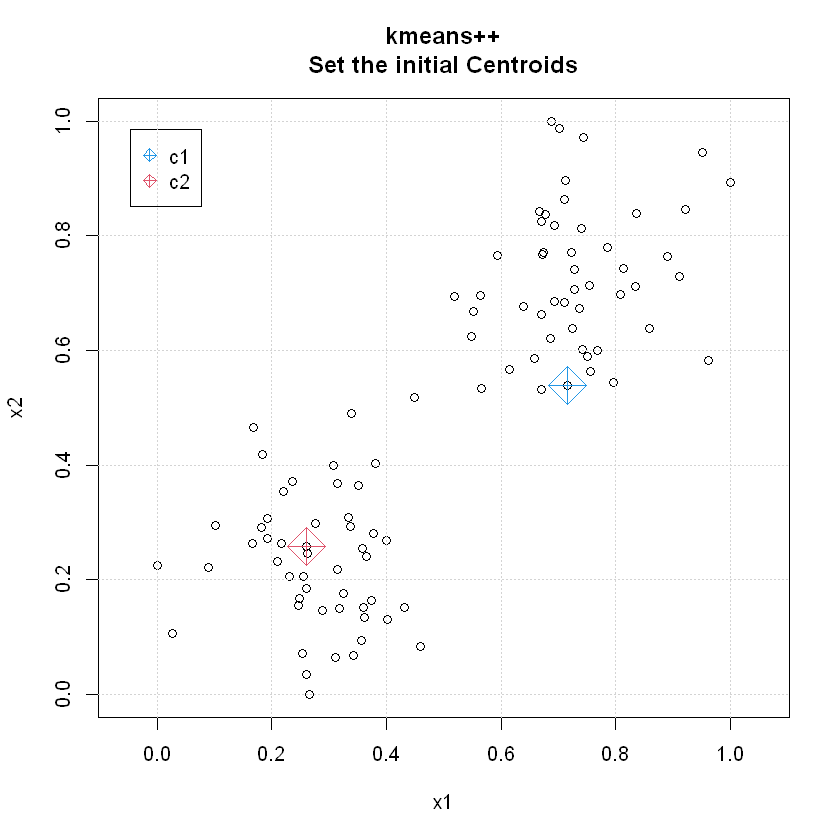

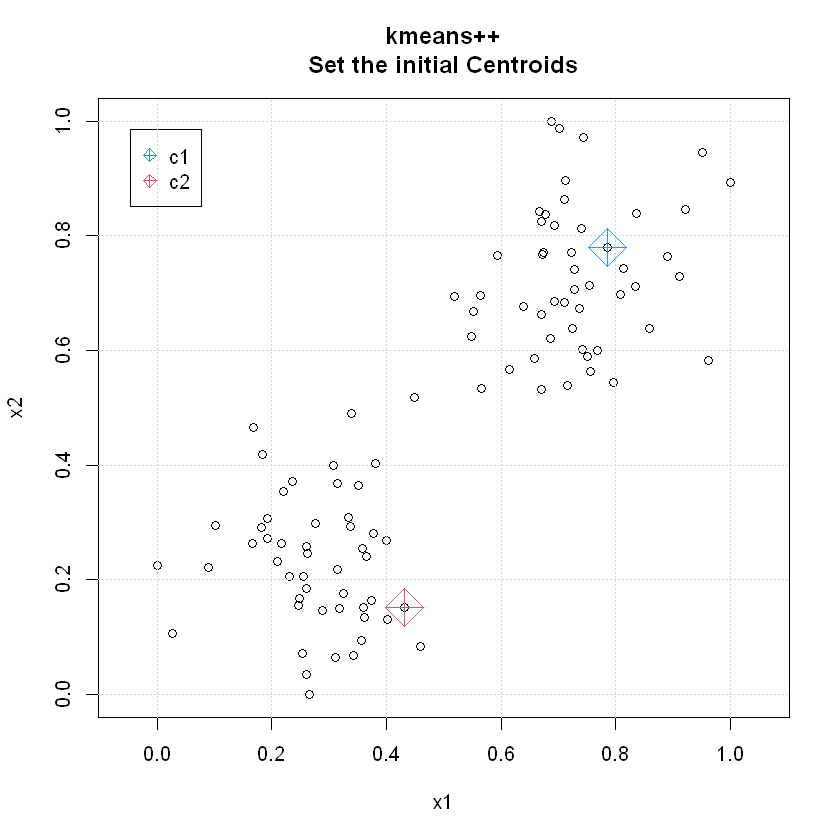

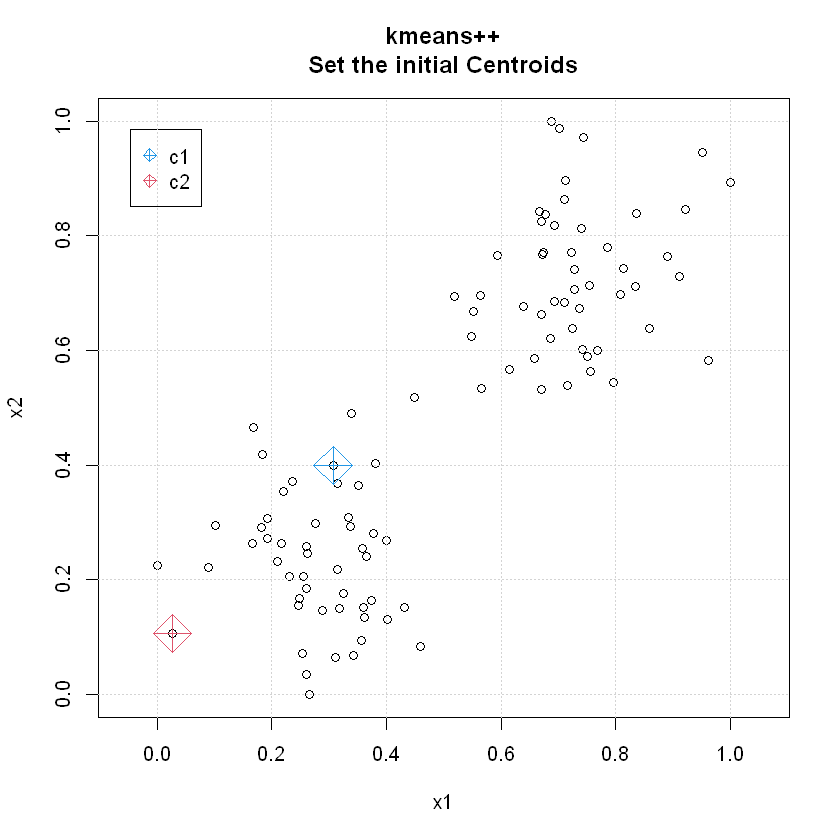

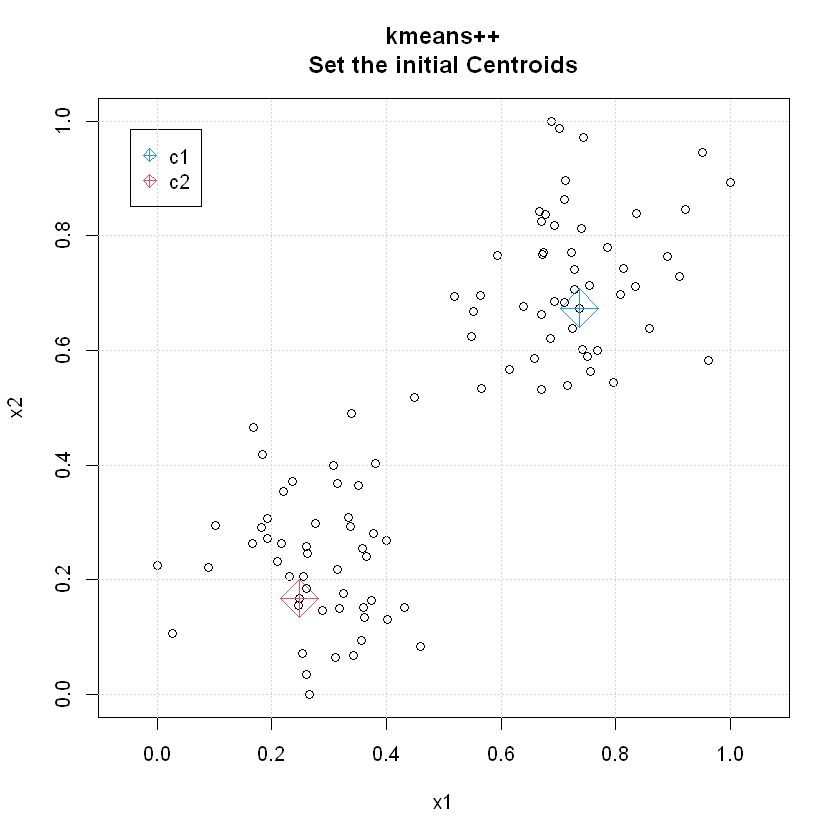

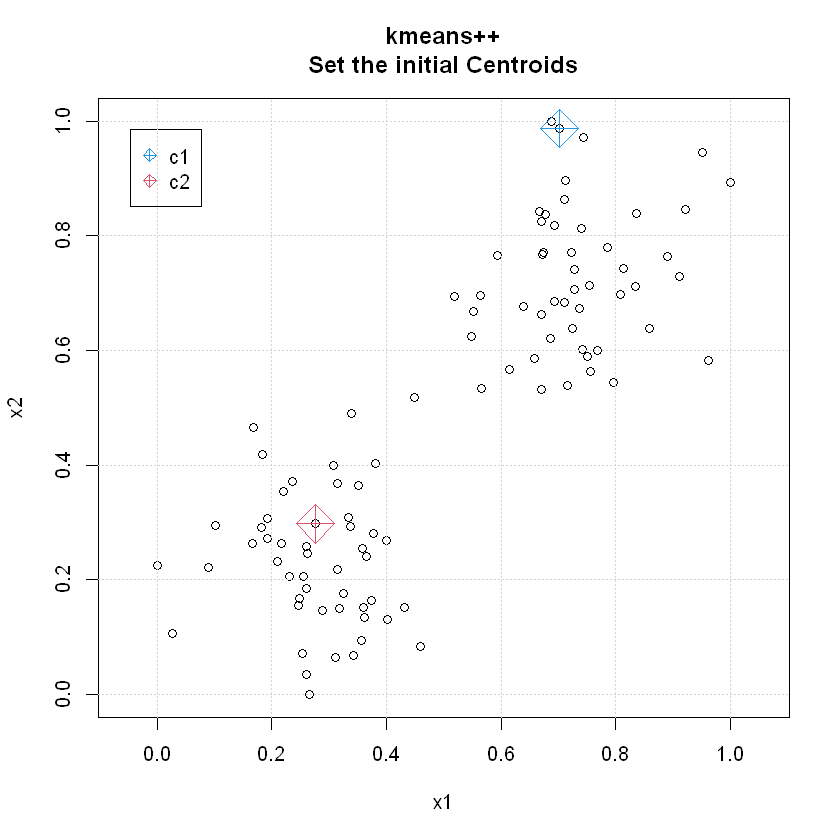

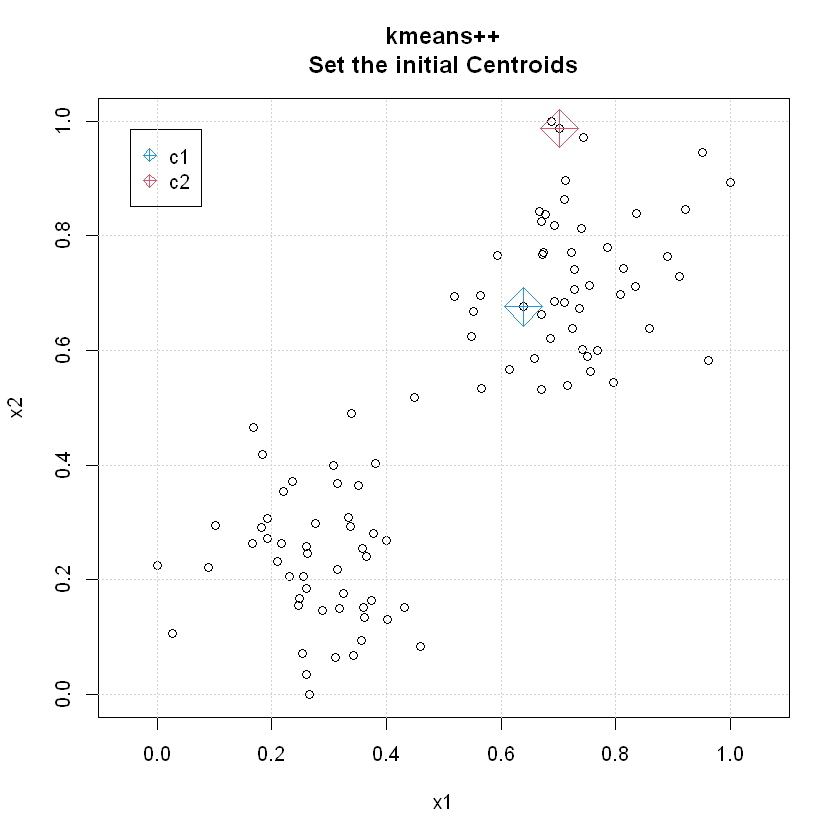

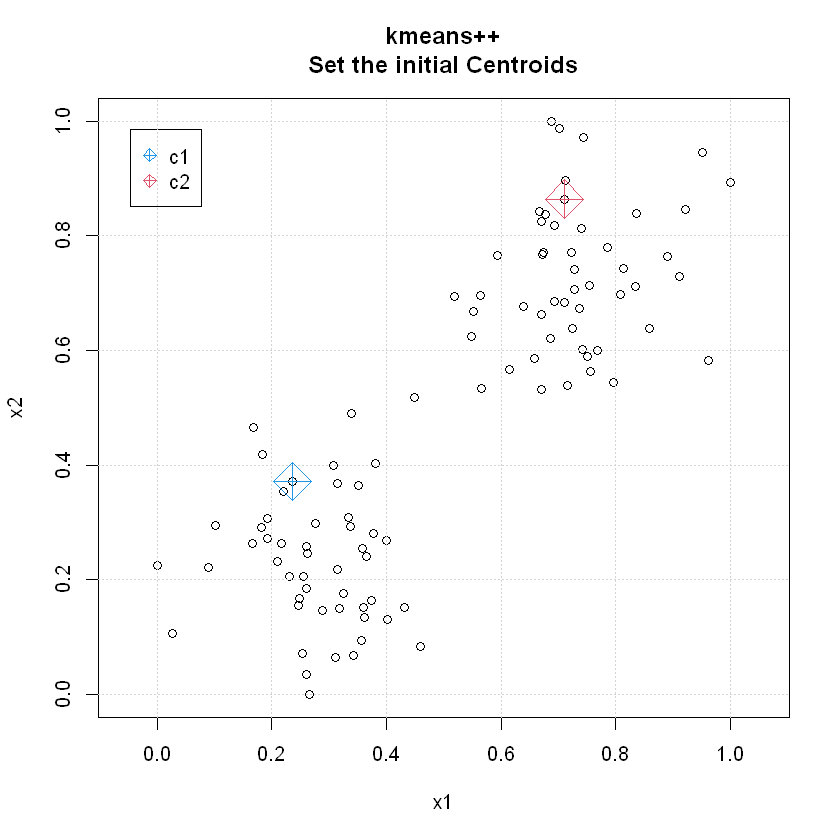

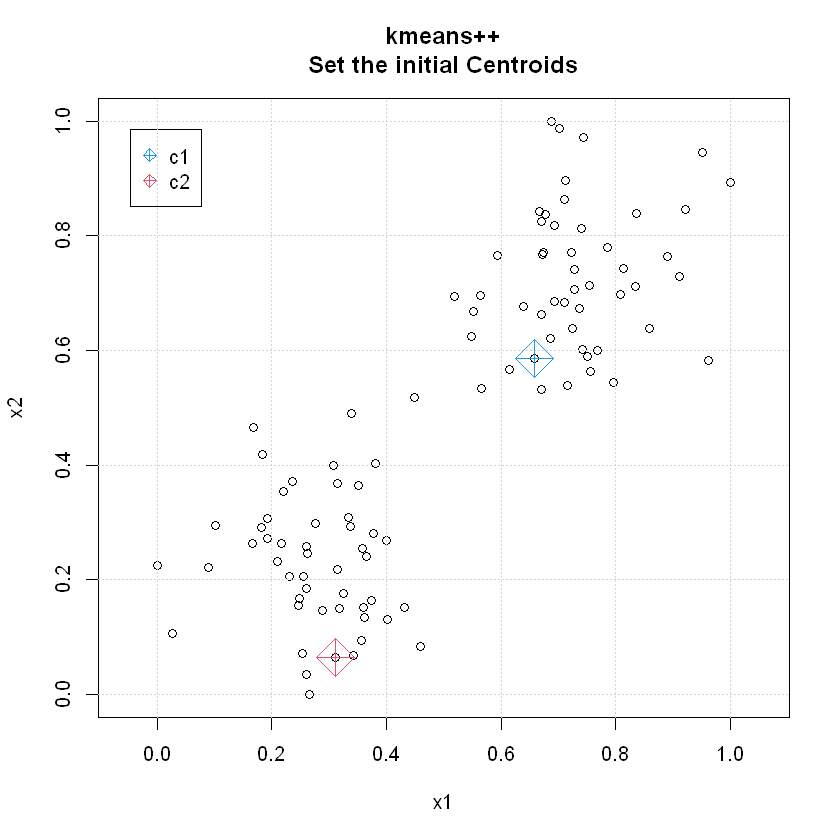

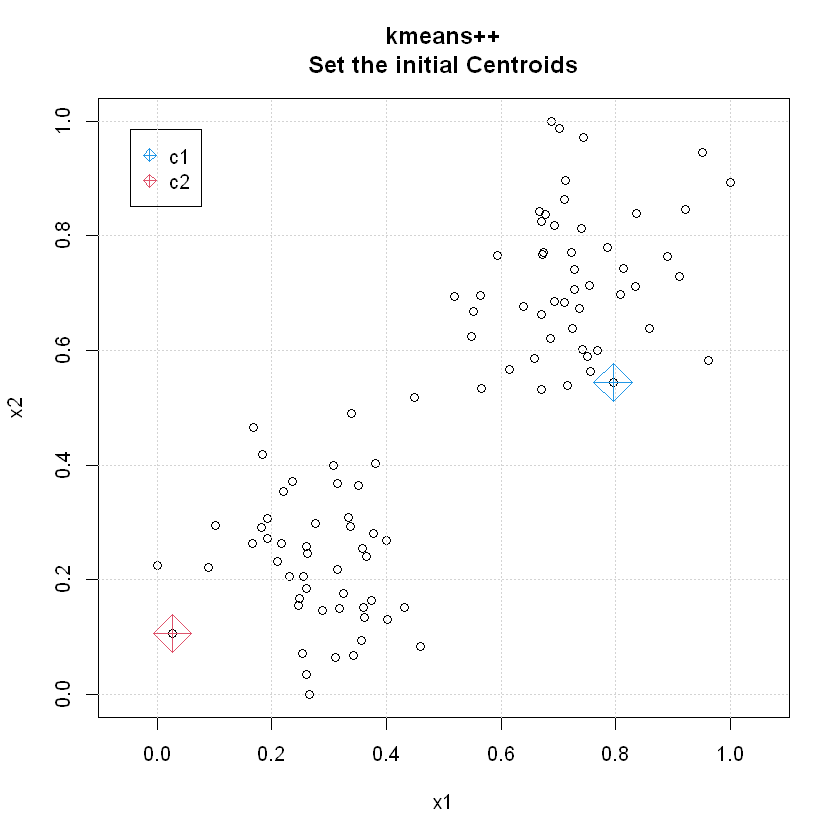

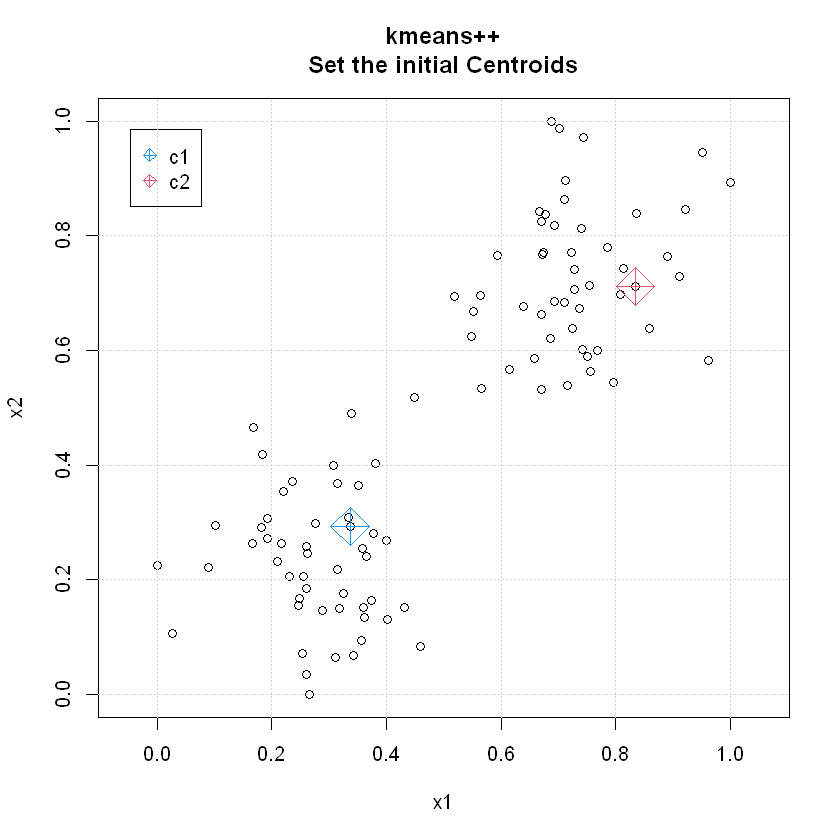

In [10]:
# ----------------------------------------生成数据--------------------------------------------------------------
normalize <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}
set.seed(1)
x <- rbind(
  matrix(rnorm(100, sd = 0.25), ncol = 2),
  matrix(rnorm(100, mean = 1, sd = 0.25), ncol = 2)
)

x[, 1] <- normalize(x[, 1])
x[, 2] <- normalize(x[, 2])

# --------------------随机设置初始簇心-------------------------------------
for (i in 1:10) {
  set.seed(i)
  cn <- sample(100, 1)
  c1 <- x[cn, ]
  D <- colSums((t(x) - c1)^2)
  p <- D / sum(D)
  c2 <- x[sample(100, 1, prob = p), ]
  plot(x,
    asp = 1, main = paste0("kmeans++", "\nSet the initial Centroids"),
    xlab = "x1", ylab = "x2"
  )
  legend("topleft",
    inset = 0.05, c("c1", "c2"),
    pt.cex = c(1, 1), pch = 9, col = c(4, 2)
  )
  grid()
  c <- rbind(c1, c2)
  points(c, pch = 9, col = c(4, 2), cex = 3)
}

与kmeans算法对比实验，可见kmeans++算法收敛得较快

  |======================================================================| 100%

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


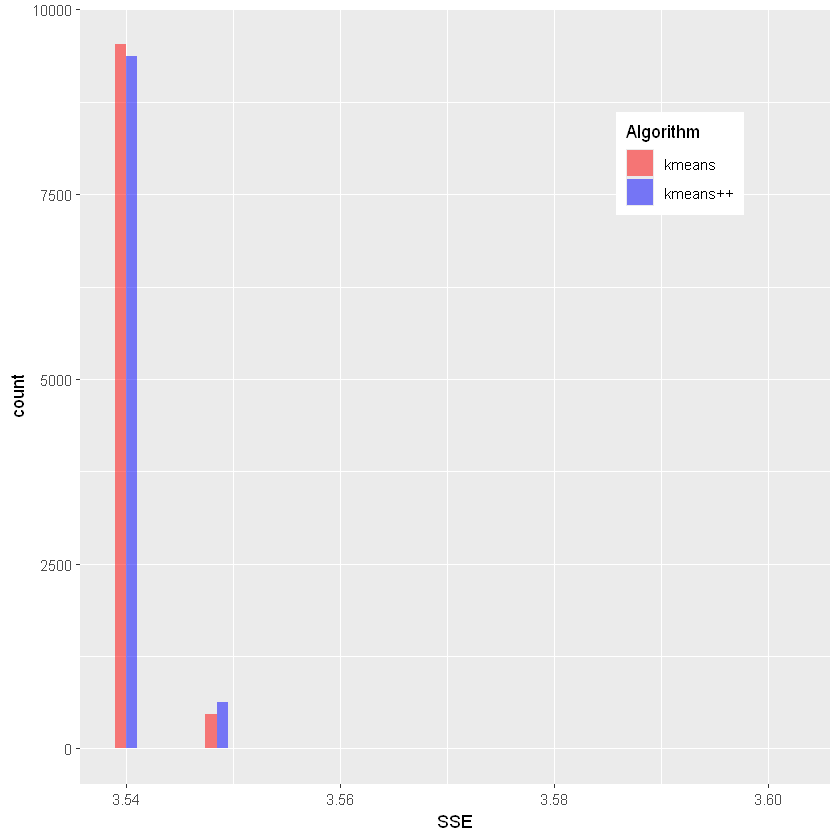

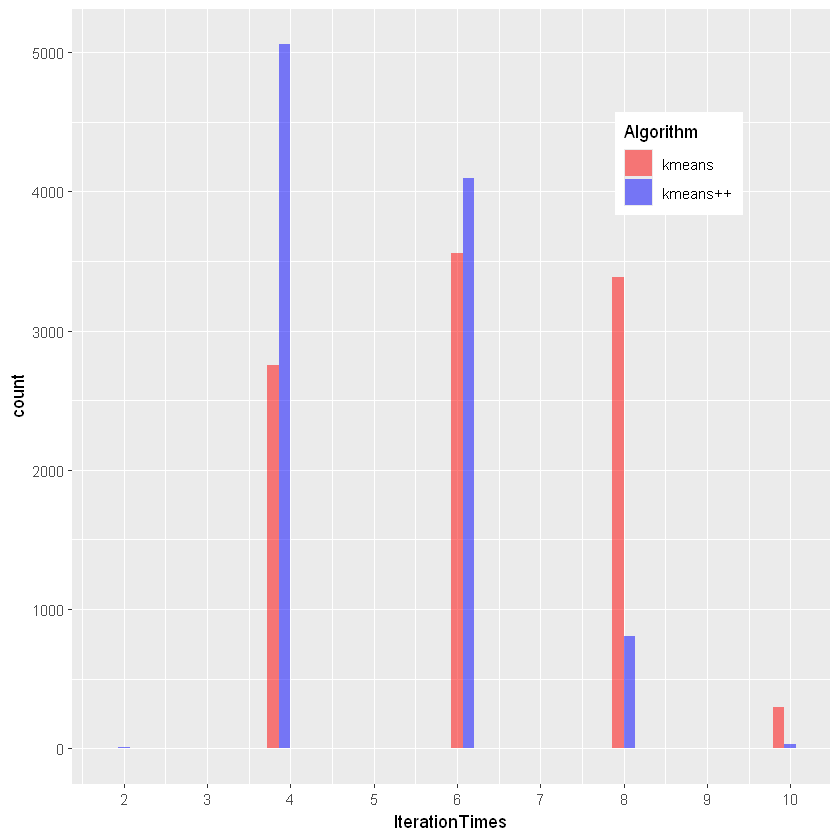

In [17]:
# ---------------------生成数据-----------------------------------
normalize <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}
set.seed(6)
x <- rbind(
  matrix(rnorm(100, sd = 0.25), ncol = 2),
  matrix(rnorm(100, mean = 1, sd = 0.25), ncol = 2)
)

x[, 1] <- normalize(x[, 1])
x[, 2] <- normalize(x[, 2])

# ------------------------kmeans++--------------------------------------
c_SSE1 <- NULL # SSE的收敛值
ni1 <- NULL    # 迭代次数

pb <- txtProgressBar(style = 3)
n <- 10000 # 实验次数
for (i in 1:n) {
  r_SSE <- NULL

  # --------------------随机设置初始簇心----------------------------
  set.seed(i)
  cn <- sample(100, 1)
  c1 <- x[cn, ]
  D <- colSums((t(x) - c1)^2)
  p <- D / sum(D)
  c2 <- x[sample(100, 1, prob = p), ]

  # -------------------------------迭代优化----------------------------------
  tolerance <- 0.01 # 收敛的容忍度
  repeat {
    #-------------------------------更新归属---------------------------------
    b <- (colSums((t(x) - c1)^2) < colSums((t(x) - c2)^2)) # 从属于簇1的点
    SSE <- sum((x[b, ] - c1)^2) + sum((x[!b, ] - c2)^2)
    r_SSE <- c(SSE, r_SSE)

    #------------------------------更新簇心------------------------------------
    if (sum(b) == 100 | sum(b) == 0) {
      break
    } else {
      c1 <- ifelse(sum(b) > 1, colMeans(x[b, ]), x[b, ])
      c2 <- ifelse(sum(!b) > 1, colMeans(x[!b, ]), x[!b, ])
    }

    SSE <- sum((x[b, ] - c1)^2) + sum((x[!b, ] - c2)^2)
    r_SSE <- c(SSE, r_SSE)

    if (length(r_SSE) > 1) {
      if ((r_SSE[2] - r_SSE[1]) < tolerance) {
        break
      }
    }
  }

  if (sum(b) == 100 | sum(b) == 0) {
    next
  } else {
    c_SSE1 <- c(c_SSE1, r_SSE[1])
    ni1 <- c(length(r_SSE), ni1)
  }

  setTxtProgressBar(pb, i / n)
}

# ================================kmeans================================
c_SSE2 <- NULL # SSE的收敛值
ni2 <- NULL # 迭代次数

for (i in 1:n) {
  r_SSE <- NULL

  # --------------------随机设置初始簇心----------------------------
  set.seed(i)
  cn <- sample(100, 2)
  c1 <- x[cn[1], ]
  c2 <- x[cn[2], ]

  # -------------------------------迭代优化----------------------------------
  tolerance <- 0.01 # 收敛的容忍度
  repeat {
    #-------------------------------更新归属---------------------------------
    b <- (colSums((t(x) - c1)^2) < colSums((t(x) - c2)^2)) # 从属于簇1的点
    SSE <- sum((x[b, ] - c1)^2) + sum((x[!b, ] - c2)^2)
    r_SSE <- c(SSE, r_SSE)

    #------------------------------更新簇心------------------------------------
    if (sum(b) == 100 | sum(b) == 0) {
      break
    } else {
      c1 <- ifelse(sum(b) > 1, colMeans(x[b, ]), x[b, ])
      c2 <- ifelse(sum(!b) > 1, colMeans(x[!b, ]), x[!b, ])
    }

    SSE <- sum((x[b, ] - c1)^2) + sum((x[!b, ] - c2)^2)
    r_SSE <- c(SSE, r_SSE)

    if (length(r_SSE) > 1) {
      if ((r_SSE[2] - r_SSE[1]) < tolerance) {
        break
      }
    }
  }

  if (sum(b) == 100 | sum(b) == 0) {
    next
  } else {
    c_SSE2 <- c(c_SSE2, r_SSE[1])
    ni2 <- c(length(r_SSE), ni2)
  }

  setTxtProgressBar(pb, i / n)
}

c_SSE <- data.frame(Algorithm = c(rep("kmeans++", n), rep("kmeans", n)), SSE = c(c_SSE1, c_SSE2))
c_ni <- data.frame(Algorithm = c(rep("kmeans++", n), rep("kmeans", n)), IterationTimes = c(ni1, ni2))

library(ggplot2)

ggplot(c_SSE, aes(x = SSE, fill = Algorithm)) +
  geom_histogram(alpha = 0.5, position = "dodge") +
  scale_fill_manual(values = c("red", "blue")) +
  theme(legend.position = c(0.8, 0.8))

ggplot(c_ni, aes(x = IterationTimes, fill = Algorithm)) +
  geom_histogram(alpha = 0.5, position = "dodge") +
  scale_fill_manual(values = c("red", "blue")) +
  scale_x_continuous(breaks = 2:10)+
  theme(legend.position = c(0.8, 0.8))

# kmeans {stats}


Perform k-means clustering on a data matrix.

### Usage

```r
kmeans(x, centers, iter.max = 10, nstart = 1,
       algorithm = c("Hartigan-Wong", "Lloyd", "Forgy",
                     "MacQueen"), trace = FALSE)
```

### Arguments

|             |                                                              |
| ----------- | ------------------------------------------------------------ |
| `x`         | numeric matrix of data, or an object that can be coerced to such a matrix (such as a numeric vector or a data frame with all numeric columns). |
| `centers`   | either the number of clusters, say `k`, or a set of initial (distinct) cluster centres. If a number, a random set of (distinct) rows in `x` is chosen as the initial centres. |
| `iter.max`  | the maximum number of iterations allowed.                    |
| `nstart`    | if `centers` is a number, how many random sets should be chosen?---多次试验 |
| `algorithm` | character: may be abbreviated. Note that `"Lloyd"` and `"Forgy"` are alternative names for one algorithm. --默认的是？没交代|
| `object`    | an **R** object of class `"kmeans"`, typically the result `ob` of `ob <- kmeans(..)`. |
| `method`    | character: may be abbreviated. `"centers"` causes `fitted` to return cluster centers (one for each input point) and `"classes"` causes `fitted` to return a vector of class assignments. |
| `trace`     | logical or integer number, currently only used in the default method (`"Hartigan-Wong"`): if positive (or true), tracing information on the progress of the algorithm is produced. Higher values may produce more tracing information. |
| `...`       | not used.                                                    |

### Details

The data given by `x` are clustered by the `k`-means method, which aims to partition the points into `k` groups such that the `sum of squares` from points to the assigned cluster centres is minimized. At the minimum, all cluster centres are at the mean of their Voronoi sets (the set of data points which are nearest to the cluster centre).

The algorithm of Hartigan and Wong (1979) is used by default. Note that some authors use `k`-means to refer to a specific algorithm rather than the general method: most commonly the algorithm given by MacQueen (1967) but sometimes that given by Lloyd (1957) and Forgy (1965). The Hartigan–Wong algorithm generally does a better job than either of those, but trying several random starts (`nstart>1`) is often recommended. In rare cases, when some of the points (rows of `x`) are extremely close, the algorithm may not converge in the “Quick-Transfer” stage, signalling a warning (and returning `ifault = 4`). Slight rounding of the data may be advisable in that case.

For ease of programmatic exploration, `k=1` is allowed, notably returning the center and `withinss`.

Except for the Lloyd–Forgy method, `k` clusters will always be returned if a number is specified. If an initial matrix of centres is supplied, it is possible that no point will be closest to one or more centres, which is currently an error for the Hartigan–Wong method.

### Value

`kmeans` returns an object of class `"kmeans"` which has a `print` and a `fitted` method. It is a list with at least the following components:

|                |                                                              |
| -------------- | ------------------------------------------------------------ |
| `cluster`      | A vector of integers (from `1:k`) indicating the cluster to which each point is allocated. |
| `centers`      | A matrix of cluster centres.                                 |
| `totss`        | The total sum of squares.--到共同的均值簇心的SSE                                    |
| `withinss`     | Vector of within-cluster sum of squares, one component per cluster. |
| `tot.withinss` | Total within-cluster sum of squares, i.e. `sum(withinss)`. --到各自簇心SSE之和  |
| `betweenss`    | The between-cluster sum of squares, i.e. `totss-tot.withinss`. |
| `size`         | The number of points in each cluster.                        |
| `iter`         | The number of (outer) iterations.                            |
| `ifault`       | integer: indicator of a possible algorithm problem – for experts. |

### Note

The clusters are numbered in the returned object, but they are a *set* and no ordering is implied. (Their apparent ordering may differ by platform.)

### References

Forgy, E. W. (1965). Cluster analysis of multivariate data: efficiency vs interpretability of classifications. *Biometrics*, **21**, 768–769.

Hartigan, J. A. and Wong, M. A. (1979). Algorithm AS 136: A K-means clustering algorithm. *Applied Statistics*, **28**, 100–108. [doi:10.2307/2346830](https://doi.org/10.2307/2346830).

Lloyd, S. P. (1957, 1982). Least squares quantization in PCM. Technical Note, Bell Laboratories. Published in 1982 in *IEEE Transactions on Information Theory*, **28**, 128–137.

MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations. In *Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability*, eds L. M. Le Cam & J. Neyman, **1**, pp. 281–297. Berkeley, CA: University of California Press.

### Example

K-means clustering with 2 clusters of sizes 50, 50

Cluster means:
            x          y
1  1.01405751 1.05942757
2 -0.08518909 0.01108085

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 8.530549 7.219291
 (between_SS / total_SS =  78.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

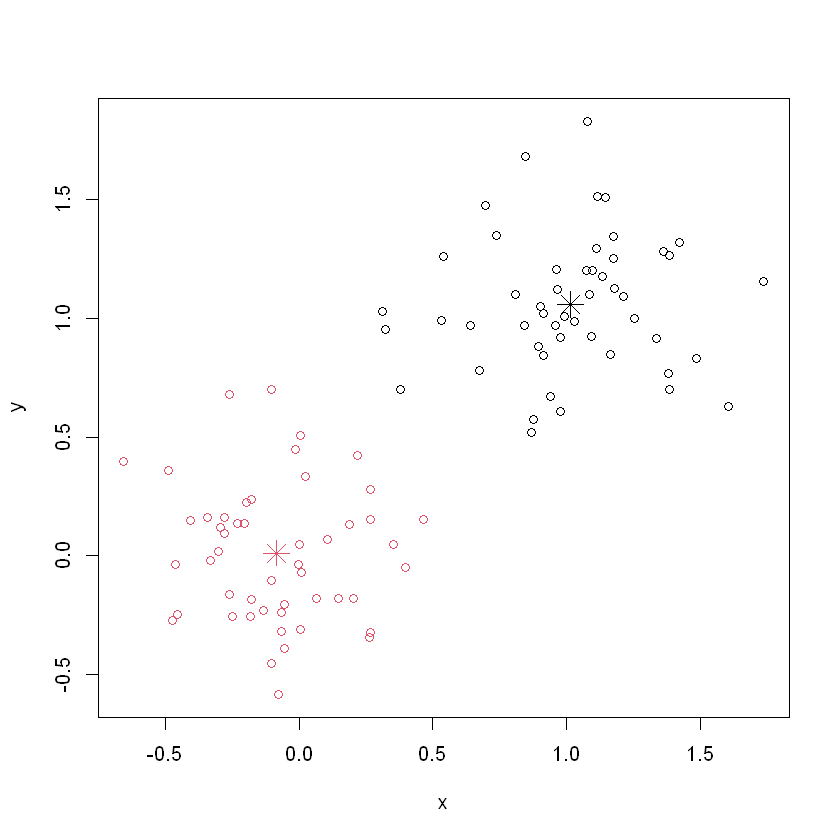

In [29]:
set.seed(11)
# a 2-dimensional example
x <- rbind(matrix(rnorm(100, sd = 0.3), ncol = 2),
           matrix(rnorm(100, mean = 1, sd = 0.3), ncol = 2))
colnames(x) <- c("x", "y")
(cl <- kmeans(x, 2))    #默认iter.max=10停止迭代，不提供tolerance参数，why？
plot(x, col = cl$cluster)   
points(cl$centers, col = 1:2, pch = 8, cex = 2)

# KMeans_arma {ClusterR}

--k-means using the Armadillo library

## Usage

```r
KMeans_arma(
  data,
  clusters,
  n_iter = 10,
  seed_mode = "random_subset",
  verbose = FALSE,
  CENTROIDS = NULL,
  seed = 1
)
```

## Arguments

| `data`      | matrix or data frame                                         |
| ----------- | ------------------------------------------------------------ |
| `clusters`  | the number of clusters                                       |
| `n_iter`    | the number of clustering iterations (about 10 is typically sufficient) --为何不提供tolerance方式？|
| `seed_mode` | how the initial centroids are seeded. One of, *keep_existing*, *static_subset*, *random_subset*, *static_spread*, *random_spread*. |
| `verbose`   | either TRUE or FALSE, indicating whether progress is printed during clustering |
| `CENTROIDS` | a matrix of initial cluster centroids. The rows of the CENTROIDS matrix should be equal to the number of clusters and the columns should be equal to the columns of the data. CENTROIDS should be used in combination with seed_mode 'keep_existing'. |
|             |                                                              |
| `seed`      | integer value for random number generator (RNG)              |

## Details

This function is an R implementation of the 'kmeans' class of the Armadillo library. It is faster than the KMeans_rcpp function but it lacks some features. For more info see the details section of the KMeans_rcpp function. The number of columns should be larger than the number of clusters or CENTROIDS. If the clustering fails, the means matrix is reset and a bool set to false is returned. The clustering will run faster on multi-core machines when OpenMP is enabled in your compiler (eg. -fopenmp in GCC)

## Value

the centroids as a matrix. In case of Error it returns the error message, whereas in case of an empty centroids-matrix it returns a warning-message.

## References

http://arma.sourceforge.net/docs.html

## Examples

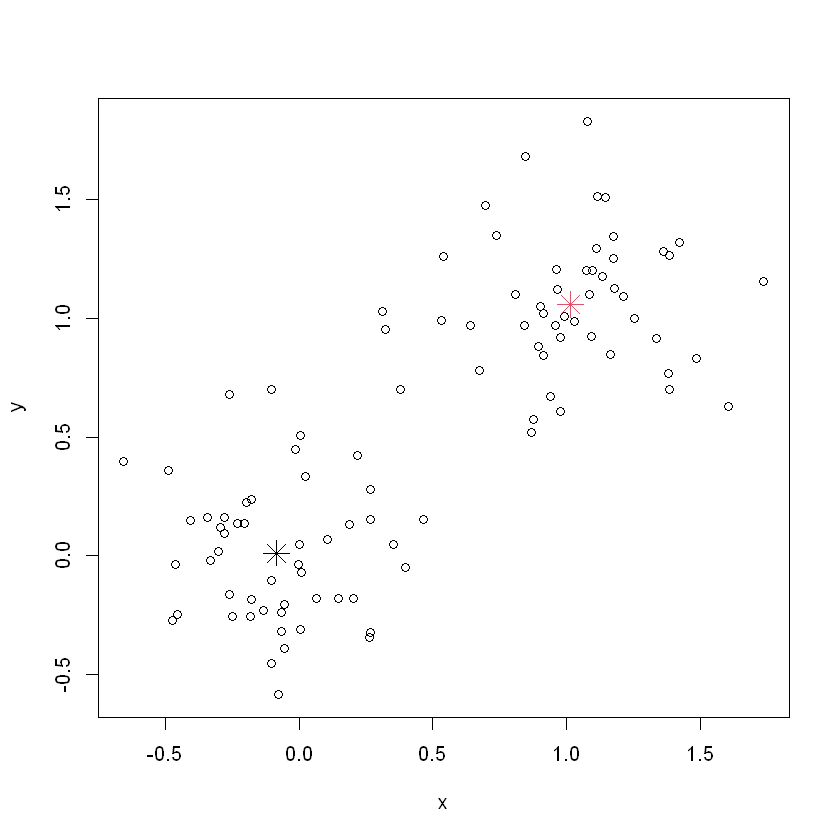

In [33]:
library(ClusterR)
set.seed(11)
# a 2-dimensional example
x <- rbind(
  matrix(rnorm(100, sd = 0.3), ncol = 2),
  matrix(rnorm(100, mean = 1, sd = 0.3), ncol = 2)
)
colnames(x) <- c("x", "y")
km <- KMeans_arma(x, clusters = 2, n_iter = 10, "random_subset") # 默认iter.max=10停止迭代，不提供tolerance参数，why？
plot(x)
points(km, col = 1:2, pch = 8, cex = 2)


# KMeans_rcpp {ClusterR}

--k-means using RcppArmadillo

### Usage

```r
KMeans_rcpp(
  data,
  clusters,
  num_init = 1,
  max_iters = 100,
  initializer = "kmeans++",
  fuzzy = FALSE,
  verbose = FALSE,
  CENTROIDS = NULL,
  tol = 1e-04,
  tol_optimal_init = 0.3,
  seed = 1
)
```


## Arguments
data	--matrix or data frame

clusters--the number of clusters

num_init--number of times the algorithm will be run with different centroid seeds

max_iters--the maximum number of clustering iterations

initializer--the method of initialization. One of, optimal_init, quantile_init, kmeans++ and random. See details for more information

fuzzy--either TRUE or FALSE. If TRUE, then prediction probabilities will be calculated using the distance between observations and centroids

verbose--either TRUE or FALSE, indicating whether progress is printed during clustering.

CENTROIDS--a matrix of initial cluster centroids. The rows of the CENTROIDS matrix should be equal to the number of clusters and the columns should be equal to the columns of the data.

tol--a float number. If, in case of an iteration (iteration > 1 and iteration < max_iters) 'tol' is greater than the squared norm of the centroids, then kmeans has converged.--应该是变化幅度的阈值

tol_optimal_init--tolerance value for the 'optimal_init' initializer. The higher this value is, the far appart from each other the centroids are.

seed--integer value for random number generator (RNG)

Details--This function has the following features in comparison to the KMeans_arma function:

Besides optimal_init, quantile_init, random and kmeans++ initilizations one can specify the centroids using the CENTROIDS parameter.

The running time and convergence of the algorithm can be adjusted using the num_init, max_iters and tol parameters.

If num_init > 1 then KMeans_rcpp returns the attributes of the best initialization using as criterion the within-cluster-sum-of-squared-error.

—————initializers———————-

optimal_init : this initializer adds rows of the data incrementally, while checking that they do not already exist in the centroid-matrix [ experimental ]

quantile_init : initialization of centroids by using the cummulative distance between observations and by removing potential duplicates [ experimental ]

kmeans++ : kmeans++ initialization. Reference : http://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf AND http://stackoverflow.com/questions/5466323/how-exactly-does-k-means-work

random : random selection of data rows as initial centroids

## Value
a list with the following attributes: clusters, fuzzy_clusters (if fuzzy = TRUE), centroids, total_SSE, best_initialization, WCSS_per_cluster, obs_per_cluster, between.SS_DIV_total.SS

## Author(s)
Lampros Mouselimis

## Examples

In [34]:
library(ClusterR)
# ----------------------------------------生成数据--------------------------------------------------------------
normalize <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}
set.seed(1)
x <- rbind(
  matrix(rnorm(100, sd = 0.25), ncol = 2),
  matrix(rnorm(100, mean = 1, sd = 0.25), ncol = 2)
)

x[, 1] <- normalize(x[, 1])
x[, 2] <- normalize(x[, 2])
colnames(x) <- c("x1", "x2")
#聚类的个数为2，尝试10次，最大迭代次数为100，初始簇心指定用"kmeans++"算法，默认的进步阈值为1e-04
km <- KMeans_rcpp(x,
  clusters = 2, num_init = 10, verbose = TRUE,
  max_iters = 100, initializer = "kmeans++"
)

 
iteration: 1 --> total WCSS: 5.02236  -->  squared norm: 0.223571
iteration: 2 --> total WCSS: 2.52316  -->  squared norm: 0
 
===================== end of initialization 1 =====================
 
iteration: 1 --> total WCSS: 29.9899  -->  squared norm: 0.593345
iteration: 2 --> total WCSS: 12.6844  -->  squared norm: 0.149698
iteration: 3 --> total WCSS: 7.85431  -->  squared norm: 0.326897
iteration: 4 --> total WCSS: 2.52776  -->  squared norm: 0.00958551
iteration: 5 --> total WCSS: 2.52316  -->  squared norm: 0
 
===================== end of initialization 2 =====================
 
iteration: 1 --> total WCSS: 8.90001  -->  squared norm: 0.355981
iteration: 2 --> total WCSS: 2.52777  -->  squared norm: 0.00959532
iteration: 3 --> total WCSS: 2.52316  -->  squared norm: 0
 
===================== end of initialization 3 =====================
 
iteration: 1 --> total WCSS: 4.27554  -->  squared norm: 0.178012
iteration: 2 --> total WCSS: 2.53752  -->  squared norm: 0.0102832
iterat

In [35]:
km$centroids   #最终的簇心

0.7302231,0.7249937
0.2788708,0.2369407


In [37]:
km$WCSS_per_cluster  #各簇的簇心距离和

1.332969,1.190194
